<a href="https://colab.research.google.com/github/edyy-Z/Data-Analysis-Class-Works/blob/main/Lab1_GSS_csv_Fall_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab 1 example**

Yongjun Zhu

In [ ]:
import zipfile
import pandas as pd
import requests
import io
from tqdm.notebook import tqdm
from __future__ import division
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.head()

Saving GSS2006.csv to GSS2006.csv


<ipython-input-1-6e7ea2753936>:19: DtypeWarning: Columns (1318,1341,1342,1384,1385,1482,1492,1497,1602,1742,1823,1841,2006,2024,2027,2028,2029,2030,2033,2039,2040,2042,2043,2048,2055,2058,2073,2078,2090,2091,2092,2093,2096,2097,2107,2399,2400,2426,2444,2445,2450,2451,2456,2457,2462,2463,2468,2469,2473,2474,2475,2476,2477,2479,2480,2481,2482,2483,2485,2486,2487,2489,2490,2492,2493,2495,2496,2497,2498,2499,2501,2502,2503,2504,2505,2507,2508,2516,2517,2518,2519,2520,2521,2522,2523,2538,2539,2540,2541,2542,2543,2544,2545,2552,2553,2554,2555,2556,2557,2558,2559,2591,2592) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.BytesIO(uploaded[filename]))


,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ80,prestg80,...,zspaneng,zwtss,zwtssnr,zwtssall,zvstrat,zvpsu,zwtssps,zwtssnrps,zfileversion,zyearval1
0,2006,1,1.0,35.0,NaN,NaN,2.0,2.0,95.0,66.0,...,english,0.43,0.49,0.4297,1957,1,0.505483,0.524713,7222.31,NaN
1,2006,2,1.0,40.0,NaN,NaN,2.0,2.0,243.0,44.0,...,english,1.91,2.16,1.9096,1957,1,2.090907,2.102368,7222.31,NaN
2,2006,3,5.0,NaN,NaN,1.0,2.0,2.0,715.0,29.0,...,spanish,0.86,0.97,0.8593,1957,1,1.448735,1.445360,7222.31,NaN
3,2006,4,2.0,24.0,NaN,NaN,2.0,2.0,313.0,46.0,...,english,0.43,0.49,0.4297,1957,1,0.385372,0.409203,7222.31,NaN
4,2006,5,6.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,english,1.29,1.46,1.2890,1957,1,1.387133,1.396702,7222.31,NaN


CODEBOOK:  The GSS 2006 data can be looked at here: https://www.thearda.com/data-archive?tab=2&fid=GSS2006

**Question #1.  Choose one variable, look at its distribution (mean, sd, median, min, max), or if it is categorical, create a simple table for it, and plot it with a histogram.  Explain what you take away from looking at the variable.**


I looked at the variable *natspac*, which asks the question: How hard is it to take time off during your work to take care of personal or family matters?

We can see the numeric values that correspond to the category labels:

> 1) Not at all hard	723	42.2
2) Not too hard	531	31.0
3) Somewhat hard	269	15.7
4) Very hard 190 11.1

Missing	2776
Total	1734	100.0


In [ ]:
df.groupby(['zfamwkoff'], observed=True)['famwkoff'].mean()

,famwkoff
zfamwkoff,
not at all hard,1.0
not too hard,2.0
somewhat hard,3.0
very hard,4.0


Counts for different answers of this variable?

In [ ]:
df.zfamwkoff.value_counts().sort_index()

,count
zfamwkoff,
not at all hard,723
not too hard,531
somewhat hard,269
very hard,190


After seeing that these numbers correspond with the codebook's numbers listed above, the big conclusion is that most people do not feel hard to take time off during their work to take care of personal or family matters?

Here is the distribution of answers as proportions:

In [ ]:
df.zfamwkoff.value_counts(normalize=True).sort_index()*100

,proportion
zfamwkoff,
not at all hard,42.206655
not too hard,30.998249
somewhat hard,15.703444
very hard,11.091652


Here is the distribution of numeric values instead of the categorical variables below.

In [ ]:
df.famwkoff.value_counts(normalize=True).sort_index()*100

,proportion
famwkoff,
1.0,42.206655
2.0,30.998249
3.0,15.703444
4.0,11.091652


Here are the numbers of mean, std, median, min, max, first quartile, second quartile, and third quartile.

In [ ]:
df[['famwkoff']].describe()

,famwkoff
count,1713.000000
mean,1.956801
std,1.010691
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


Here is a graph of this variable, showing most people it is not hard to take time off during their work to take care of their personal or family issues.

<Axes: xlabel='zfamwkoff', ylabel='Count'>

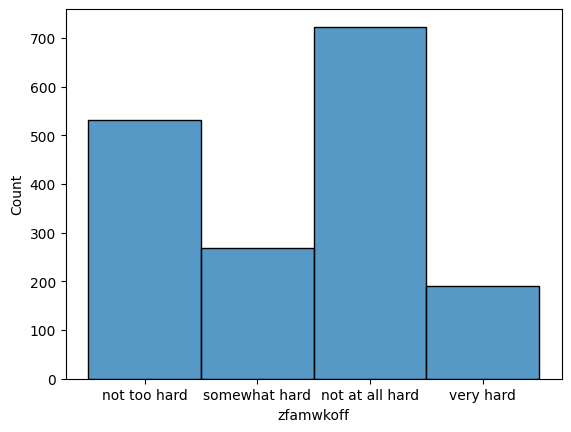

In [ ]:
sns.histplot(data=df, x="zfamwkoff")


**2-- Choose some continuous-ish variable, and calculate its mean and standard deviation by some grouping variable.  Plot it using a box-plot.  Explain what conclusion you draw from this analysis.**

I am going to stick with the variable FAMWKOFF, and I will look at (sphrs1) how many hours did he or she work last week, if their spouses also work. Specifically, the variable SPHRS1 asks, "IF SPOUSE WORKING, FULL- OR PART-TIME: How many hours did (he/she work last week, at all jobs? "  The code book indicates that for n=1434, the average hours was	43.31, with standard deviation of	15.27.

In [ ]:
df.groupby(['zfamwkoff'], observed=True)['sphrs1'].mean()

,sphrs1
zfamwkoff,
not at all hard,41.881481
not too hard,42.204188
somewhat hard,41.632653
very hard,45.677419


We can see that the harder they feel they have no time for family, the longer average hours they worked if their spouses are working. For people who feel not hard at all, they work 41.8 hrs a week; while, for people who feel very hard to spend time on family, they work longer, about 45.7 hrs a week, with the same condition that their spouses were working. This is consistent with the more work done, the more likely they feel hard to spend time on taking care personal or family.

In [ ]:
df.groupby(['zfamwkoff'], observed=True)['sphrs1'].std()

,sphrs1
zfamwkoff,
not at all hard,14.243789
not too hard,12.994946
somewhat hard,15.142885
very hard,15.309671


<Axes: xlabel='zfamwkoff', ylabel='sphrs1'>

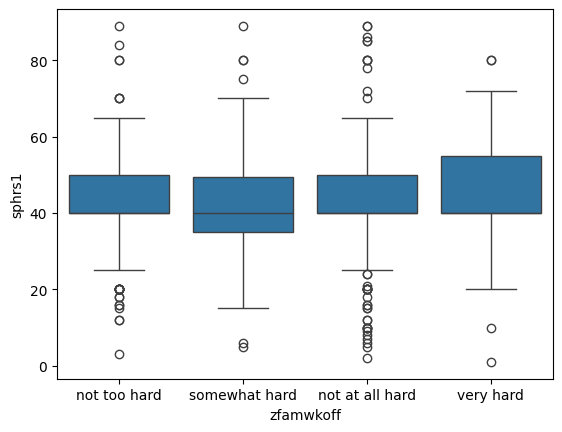

In [ ]:
sns.boxplot(data=df, x="zfamwkoff", y="sphrs1")

With regard to the standard deviations, we can see that those who consider it VERY HARD having time spent on taking care family, there is a very large variability in the range of hours worked per week if their spouses work, so even with lower hours worked, it is still possible to feel VERY HARD having time spend on taking care family. What's more, the VERY HARD and SOMEWHAT HARD groups both have very high variability (which we saw in the standard deviation of above 15). However, there are some very long working time represented in the VERY HARD category where SOMEWHAT HARD does not.

**3-- Choose two categorical-ish variables, and cross-tabulate them.  Plot them using a stacked bar chart.  Explain what conclusion you draw from this analysis.**

I am going to stick with FAMWOKOFF, now cross-tabulating it with ZFAMVSWK, or specifically, the wrkstat variable asks: "How often do the demands of your family interfere with your work on the job?"

We can see that 51% of people whose family never interfere with their work on the job feel not hard at all with spending time on taking care family, while only 37.3% people whose family often interfere with their work on the job feel not hard at all with spending time on taking care family. It seems that as more interferences happened, the harder people may feel.

In [ ]:
pd.crosstab(df.zfamwkoff, df.zfamvswk, normalize='columns')*100

zfamvswk,never,often,rarely,sometimes
zfamwkoff,,,,
not at all hard,51.263538,37.313433,38.124054,37.441860
not too hard,24.187726,16.417910,36.308623,33.953488
somewhat hard,10.469314,20.895522,18.305598,17.674419
very hard,14.079422,25.373134,7.261725,10.930233


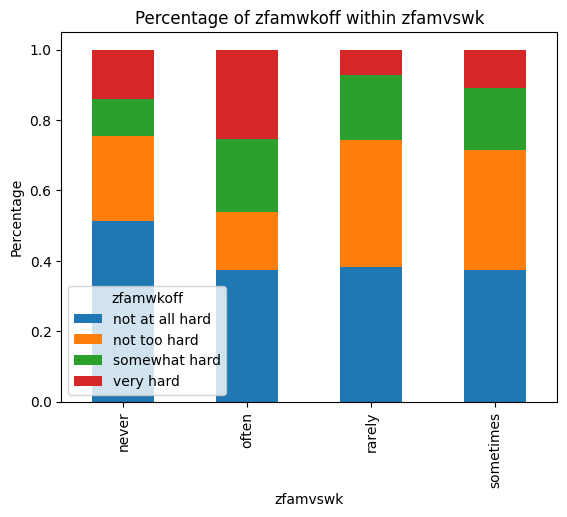

In [ ]:
# code from Lab 1 example
def plot_grouped_percentage(df, group_vars):
    """
    This function groups the dataframe by the provided variables, calculates
    the percentage for each group, and plots a stacked bar chart where each bar sums to 100%.

    Parameters:
    df: pandas DataFrame
    group_vars: list of strings, variable names to group by
    """
    group_counts = df.groupby(group_vars, observed=True).size().unstack()
    group_percentages = group_counts.div(group_counts.sum(axis=1), axis=0)
    group_percentages.plot(kind='bar', stacked=True)
    plt.ylabel('Percentage')
    plt.title(f'Percentage of {group_vars[1]} within {group_vars[0]}')
plot_grouped_percentage(df, ['zfamvswk', 'zfamwkoff'])

This bar chart shows exactly the same thing as the table.  The blue chunk for the people whose family never interfere their work(zfamwkoff='not at all hard',first column) is much larger than the blue chunk for the people whose famly often interfere their work('zfamwkoff='not at all hard', second column), which indicates that as more interferences happened, the harder people may feel spending time on family.